Number of Clusters: 5
Davies-Bouldin Index: 1.1650357148002946
Silhouette Score: 0.34009012879767


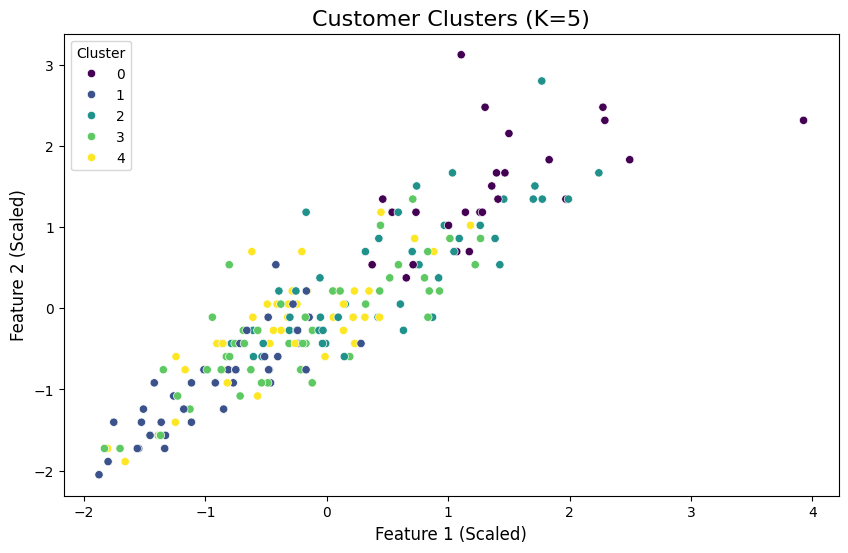

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year


customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Merge customer and transaction data
customer_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left')


customer_data['TotalValue'] = customer_data['TotalValue'].fillna(0)
customer_data['Quantity'] = customer_data['Quantity'].fillna(0)


customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)


features = customer_data_encoded[['TotalValue', 'Quantity', 'SignupYear'] + 
                                  [col for col in customer_data_encoded.columns if 'Region_' in col]]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


n_clusters = 5  # We can use any no. of cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)


db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_data['Cluster'])


print(f"Number of Clusters: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=customer_data['Cluster'], 
    palette='viridis'
)
plt.title(f"Customer Clusters (K={n_clusters})", fontsize=16)
plt.xlabel('Feature 1 (Scaled)', fontsize=12)
plt.ylabel('Feature 2 (Scaled)', fontsize=12)
plt.legend(title="Cluster")
plt.show()


customer_data.to_csv('FirstName_LastName_Clustering.csv', index=False)
